In [1]:
import numpy as np
import pandas as pd

In [2]:
customer=pd.read_csv('customers.csv')
payment=pd.read_csv('payments_201506.csv')

In [3]:
customer['av_price']=customer['total_price']/customer['count']
customer=customer.dropna()
customer=customer.drop(customer[customer['count']==1000].index, axis=0)
customer=customer.drop(customer[customer['total_price']<=0].index, axis=0)

In [4]:
x1=customer[['count','av_price']]

In [5]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(x1)
X=std.transform(x1)

In [6]:
customer['std_count']=X[:, 0]
customer['std_price']=X[:, 1]

In [7]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
cluster=km.fit_predict(X)
customer['cluster']=cluster

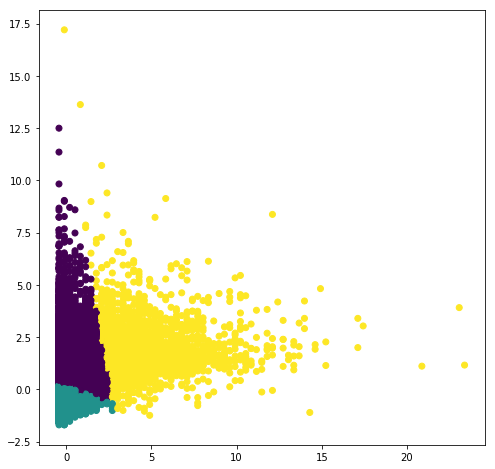

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
x=customer['std_count']
y=customer['std_price']
plt.figure(figsize=(8,8))
plt.scatter(x, y, c=cluster)

In [11]:
data=payment.pivot_table(values=['price'], index=['user_id'], columns=['item_name'],aggfunc='sum').fillna(0)

In [12]:
data=data.reset_index()

In [14]:
data.columns=['user_id','item1', 'item10', 'item11', 'item12', 'item13', 'item14', 'item15', 'item16', 'item17', 'item18', 'item19', 'item2', 'item20', 'item21', 'item22', 'item23', 'item24', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8', 'item9']

In [15]:
data.head()

,user_id,item1,item10,item11,item12,item13,item14,item15,item16,item17,...,item22,item23,item24,item3,item4,item5,item6,item7,item8,item9
0,1050188,8064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1060071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2880.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1060131,10080.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1060342,8064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7776.0,0.0,0.0,0.0,0.0,0.0
4,1060877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11520.0,1728.0,2304.0,7200.0,0.0


In [16]:
newdata=pd.merge(data, customer, how='inner', on='user_id')

In [17]:
columns=['item1','item2','item3','item4','item5','item6','item7','item8','item9','item10',
         'item11','item12','item13','item14','item15','item16','item17','item18','item19','item20',
         'item21','item22','item23','item24']
X=newdata[columns]
y=newdata['cluster']

In [22]:
X=X.as_matrix()

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier()

In [31]:
rfc2.fit(X_train, y_train)
print(rfc2.score(X_train, y_train))
print(rfc2.score(X_test, y_test))

0.8464178464178465
0.7352185089974294


In [53]:
from sklearn.svm import SVC
svc=SVC(C=1, gamma=0.1)

In [54]:
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.8507078507078507
0.7275064267352185


In [55]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [ ]:
gnb.fit(X_train, y_train)
print(gnb.score(X_train, y_train))
print(gnb.score(X_tra))